# 분산분석 예제

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # 정규분포, t분포, 신뢰구간(z분포, t분포), 가설검정(z-test, t-test, paired t-test)

### Oneway ANOVA

In [2]:
data1 = pd.read_csv("headlight.csv")
data1

,value,group
0,15,A
1,11,A
2,12,A
3,13,A
4,12,A
5,18,B
6,17,B
7,16,B
8,17,B
9,16,B


<AxesSubplot:xlabel='group', ylabel='value'>

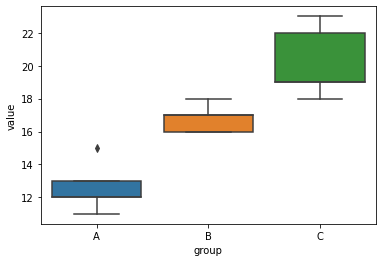

In [3]:
sns.boxplot(data=data1, x="group", y="value")

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [5]:
anova1 = ols('value ~ group', data = data1).fit()
anova_lm(anova1)   

,df,sum_sq,mean_sq,F,PR(>F)
group,2.0,144.933333,72.466667,28.233766,0.000029
Residual,12.0,30.800000,2.566667,NaN,NaN


In [6]:
stats.f.ppf(0.95, dfn=2, dfd=12)

3.8852938346523933

### 등분산 검정

In [7]:
data1_A = data1[data1['group']=='A']['value']
data1_B = data1[data1['group']=='B']['value']
data1_C = data1[data1['group']=='C']['value']

In [8]:
stats.bartlett(data1_A, data1_B, data1_C)

BartlettResult(statistic=2.8944987583039246, pvalue=0.2352163902021605)

### Twoway ANOVA

In [9]:
data2 = pd.read_csv("marketing.csv")
data2

,media,strategy,sales
0,Television,Convenience,491
1,Television,Convenience,712
2,Television,Convenience,558
3,Television,Convenience,447
4,Television,Convenience,479
5,Television,Convenience,624
6,Television,Convenience,546
7,Television,Convenience,444
8,Television,Convenience,582
9,Television,Convenience,672


In [10]:
anova2 = ols('sales ~ strategy + media + strategy:media', data = data2).fit()
anova_lm(anova2)  

,df,sum_sq,mean_sq,F,PR(>F)
strategy,2.0,98838.633333,49419.316667,5.325180,0.007748
media,1.0,13172.016667,13172.016667,1.419351,0.238720
strategy:media,2.0,1609.633333,804.816667,0.086723,0.917058
Residual,54.0,501136.700000,9280.309259,NaN,NaN


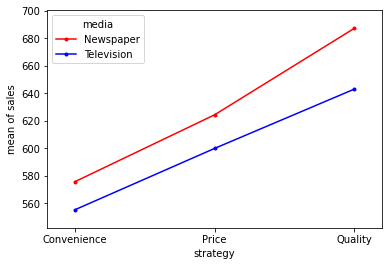

In [11]:
from statsmodels.graphics.api import interaction_plot
interaction_plot(data2["strategy"], data2["media"], data2["sales"], 
                 colors=["red", "blue"])
plt.show()

# 범주형 자료분석 예제

### 적합성 검정

In [12]:
Obs = np.array([285, 66, 55, 44])
Pr = np.array([0.68, 0.13, 0.11, 0.08])
n = Obs.sum(); E = n*Pr; df = len(Obs)-1

In [13]:
print(" Observed :", Obs, "\n", 
      "Proportion :", Pr, "\n", 
      "Expected :",E)

 Observed : [285  66  55  44] 
 Proportion : [0.68 0.13 0.11 0.08] 
 Expected : [306.   58.5  49.5  36. ]


In [14]:
chi2, p = stats.chisquare(Obs ,E)

In [15]:
print (" Chi-Squared :", round(chi2, 4), "\n",
       "df :", df,"\n",
       "P-Value :", round(p, 4),"\n",
       "critical value :", round(stats.chi2.ppf(0.95, df),4))

 Chi-Squared : 4.7916 
 df : 3 
 P-Value : 0.1877 
 critical value : 7.8147


### 독립성 검정

In [16]:
defective = np.array([[11,25,27],[15,31,28],[44,24,52],[10,17,16]])
column_names = ['Line1', 'Line2', 'Line3']
row_names    = ['상판', '다리', '서랍', '도색']
table = pd.DataFrame(defective, columns=column_names, index=row_names)
table

,Line1,Line2,Line3
상판,11,25,27
다리,15,31,28
서랍,44,24,52
도색,10,17,16


In [17]:
chi22, p2, dof, expected = stats.chi2_contingency(defective)
print (" Pearson's Chi-squared test","\n",
       "Chi-Squared :",round(chi22,4),"\n",
       "df :",dof,"\n",
       "P-Value :", round(p2, 4),"\n",
       "critical value :", round(stats.chi2.ppf(0.95, dof),4))

 Pearson's Chi-squared test 
 Chi-Squared : 17.8474 
 df : 6 
 P-Value : 0.0066 
 critical value : 12.5916


# 비모수 검정 예시

### Mann Whitney U 검정

In [18]:
stats.norm.cdf(-0.2143, loc=0, scale=1)*2

0.8303131180374956

In [19]:
stats.norm.ppf(0.025, loc=0, scale=1)

-1.9599639845400545

In [20]:
x = [70, 60, 45, 90, 95, 80, 85]
y = [100, 95, 55, 65, 75, 75]
stats.mannwhitneyu(x, y)

MannwhitneyuResult(statistic=19.5, pvalue=0.8860917695085568)

### Wilcoxon Signed-rank 검정

In [21]:
d = [1.5, 1.5, -3, -4, -5, -6, 7, 8, 9]

In [22]:
stats.wilcoxon(d)

WilcoxonResult(statistic=18.0, pvalue=0.65234375)

# 상관계수 검정

In [23]:
used_car = pd.read_csv("used_car.csv")
used_car.head()
x=used_car['price']
y=used_car['odometer']

#### 산점도를 그려 선형관계 파악하기

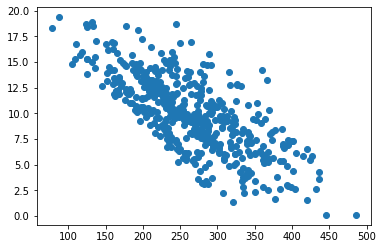

In [24]:
plt.scatter(x, y)
plt.show()

### Pearson correlation coefficient

In [25]:
stats.pearsonr(x, y)

(-0.7288193861544564, 5.899045430354528e-84)

### Spearman correlation coefficient

In [26]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.7177799550205398, pvalue=2.5095391491547877e-80)

### Kendall's tau coefficient

In [27]:
x = [1, 2, 3, 4, 5]
y = [3, 4, 1, 2, 5]

In [28]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=0.19999999999999998, pvalue=0.747060078104662)

In [29]:
stats.kendalltau(x, y)

KendalltauResult(correlation=0.19999999999999998, pvalue=0.8166666666666667)